In [10]:
def calculate_compound_interest(P: float, r: float, n: int, t: float) -> float:
    """
    Calculate the compound interest.

    Parameters:
    P (float): Initial principal amount
    r (float): Interest rate (decimal)
    n (int): Number of times interest is compounded per year
    t (float): Time period in years

    Returns:
    float: Final accumulated amount (principal + compound interest)
    """
    A = P * (1 + r / n) ** (n * t)
    return A

In [11]:
# Define your principal amount, interest rate, number of times interest is compounded per year
# and time period in years
P = 5000  # Principal amount
r = 0.05  # Interest rate (5% interest rate is 0.05 in decimal)
n = 4  # Interest is compounded quarterly
t = 10  # Time period in years

# Call the function with these values
final_amount = calculate_compound_interest(P, r, n, t)

In [12]:
# Output
summary = f"""
Initial deposit: ${P:,.2f}
Interest rate: {r*100}% yearly
Compounded: {n} times per year
Time: {t} years
The final accumulated amount: {final_amount}
"""

print(summary)


Initial deposit: $5,000.00
Interest rate: 5.0% yearly
Compounded: 4 times per year
Time: 10 years
The final accumulated amount: 8218.097317435051



In [13]:
import pandas as pd

In [14]:
# Constants that act as constraints
MAX_PRINCIPAL = 1e10  # $10,000,000,000
MAX_ANNUAL_INTEREST_RATE = 0.99  # 99%
MAX_YEARS = 1e2  # 100 years

In [15]:
def check_value(value: float, name: str) -> None:
    """
    Check if a given value is valid.

    Parameters:
    value (float): The value to be checked.
    name (str): The name of the value.

    Raises:
    ValueError: If the value is negative or zero.

    Returns:
    None
    """
    if value < 0:
        raise ValueError(f"{name} must be non-negative")
    if value == 0:
        raise ValueError(f"{name} must be non-zero")

In [16]:
def calculate_monthly_balance_and_interest(
    principal: float, annual_interest_rate: float, years: int
) -> pd.DataFrame:
    """
    Calculate the monthly balance and interest for a given principal, annual interest rate, and number of years.

    Args:
        principal (float): The initial amount of money.
        annual_interest_rate (float): The annual interest rate as a decimal.
        years (int): The number of years for which the interest is calculated.

    Returns:
        pd.DataFrame: A DataFrame containing the monthly balance and interest for each month.
    """

    # Add checks for input size
    if principal > MAX_PRINCIPAL:
        raise ValueError("Principal is too large")
    if annual_interest_rate > MAX_ANNUAL_INTEREST_RATE:
        raise ValueError("Annual interest rate is too large")
    if years > MAX_YEARS:
        raise ValueError("Years is too large")

    # Check if the inputs are non-negative and non-zero
    check_value(principal, "Principal")
    check_value(annual_interest_rate, "Annual interest rate")
    check_value(years, "Years")

    # Check if years is an integer
    if not isinstance(years, int):
        raise ValueError("Years must be an integer")

    monthly_interest_rate = annual_interest_rate / 12
    months = years * 12
    balance = principal
    data = {"Month": [], "Interest": [], "Balance": []}

    for month in range(1, months + 1):
        interest = balance * monthly_interest_rate
        balance += interest
        data["Month"].append(month)
        data["Interest"].append(interest)
        data["Balance"].append(balance)

    return pd.DataFrame(data)

In [17]:
# Use the function
df = calculate_monthly_balance_and_interest(5000, 0.05, 5)

print(df.head(10))  # Print the first 10 rows

# Generate HTML table
html_table = df.to_html(index=False, justify="center")

# Save to file
with open("output.html", "w") as f:
    f.write(html_table)

   Month   Interest      Balance
0      1  20.833333  5020.833333
1      2  20.920139  5041.753472
2      3  21.007306  5062.760778
3      4  21.094837  5083.855615
4      5  21.182732  5105.038347
5      6  21.270993  5126.309340
6      7  21.359622  5147.668962
7      8  21.448621  5169.117583
8      9  21.537990  5190.655573
9     10  21.627732  5212.283304


![html_output_picture](https://github.com/shri4r/compound-interest-visualizer/assets/47565405/71f73687-be8c-4eef-8905-1bf0fcaa18b2)

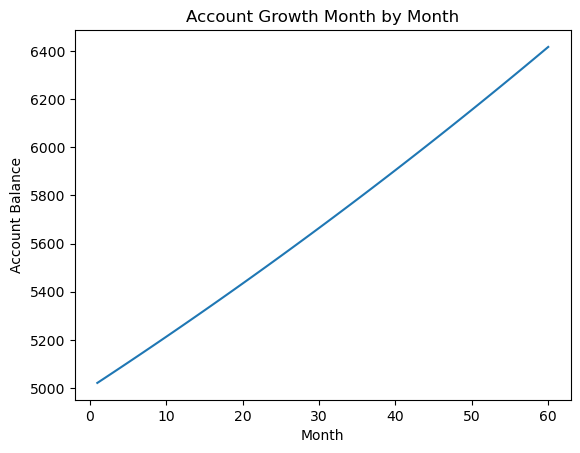

In [18]:
import matplotlib.pyplot as plt

# Get the months and balances data
months = df["Month"]
balances = df["Balance"]

# Plot the line chart
plt.plot(months, balances)

# Set the labels and title
plt.xlabel("Month")
plt.ylabel("Account Balance")
plt.title("Account Growth Month by Month")

# Show the plot
plt.show()